# 1) DATA LOADING

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind

# Initial quality checks to ensure data integrity
# Load the datasets
child_mortality_df = pd.read_csv('Child_Mortality_Rate.csv')  # Replace with the correct path
region_data_df = pd.read_csv('Region_Data.csv')
malnutrition_data_df = pd.read_csv('World_Malnutrition_Data.csv')

print("Initial Shape of Child Mortality Data:", child_mortality_df.shape)
print("Initial Shape of Region Data:", region_data_df.shape)
print("Initial Shape of Malnutrition Data:", malnutrition_data_df.shape)

# Calculate the percentage of missing values per column for quality monitoring
def missing_percentage(df):
    return (df.isnull().sum() / len(df)) * 100

print("\nPercentage of missing values in Child Mortality Data:")
print(missing_percentage(child_mortality_df))

print("\nPercentage of missing values in Region Data:")
print(missing_percentage(region_data_df))

print("\nPercentage of missing values in Malnutrition Data:")
print(missing_percentage(malnutrition_data_df))


Initial Shape of Child Mortality Data: (30940, 7)
Initial Shape of Region Data: (5302, 6)
Initial Shape of Malnutrition Data: (30901, 6)

Percentage of missing values in Child Mortality Data:
Unnamed: 0                 0.000000
Country                    0.000000
Year                       0.000000
Gender                     0.000000
Child Mortality(1 to 4)    0.000000
Total Population           2.831286
Mortality Rate             2.831286
dtype: float64

Percentage of missing values in Region Data:
Geographic Area    0.0
Indicator          0.0
Sex                0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
Unit of Measure    0.0
dtype: float64

Percentage of missing values in Malnutrition Data:
Country            0.0
Indicator          0.0
Sex                0.0
TIME_PERIOD        0.0
OBS_VALUE          0.0
Unit of Measure    0.0
dtype: float64


# 2) DATA CLEANING



Verifying after cleaning:
       Country  Year  Gender  Child Mortality(1 to 4)  Total Population  \
0  Afghanistan  1967  Female                  26012.0          5080.813   
1  Afghanistan  1968  Female                  26192.0          5202.606   
2  Afghanistan  1969  Female                  26335.0          5333.936   
3  Afghanistan  1970  Female                  26562.0          5476.630   
4  Afghanistan  1971  Female                  26671.0          5630.099   

   Mortality Rate  
0        5.119653  
1        5.034400  
2        4.937255  
3        4.850063  
4        4.737217  

QA Check - Child Mortality Data
Data Types:
Country                     object
Year                         int64
Gender                      object
Child Mortality(1 to 4)    float64
Total Population           float64
Mortality Rate             float64
dtype: object
Total Missing Values per Column:
Country                    0
Year                       0
Gender                     0
Child Mortali

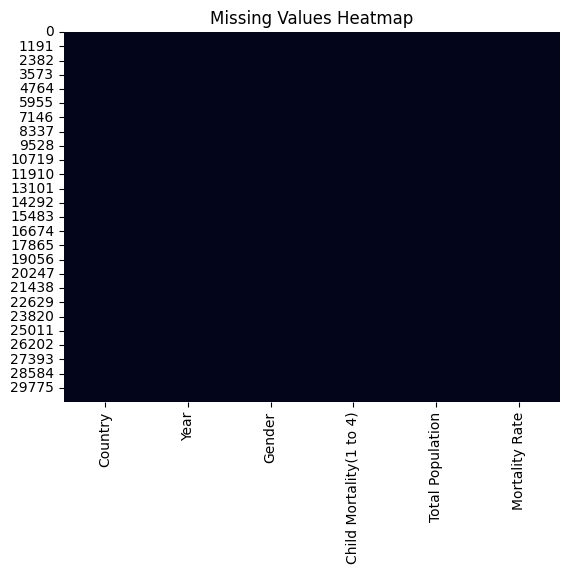

In [2]:
# Create a function to display QA statistics post-cleaning
def qa_check(df, df_name):
    print(f"\nQA Check - {df_name}")
    print("Data Types:")
    print(df.dtypes)
    print("Total Missing Values per Column:")
    print(df.isnull().sum())
    print("Unique Values per Column:")
    print(df.nunique())
    print("Summary Stats:")
    print(df.describe())




# Handle missing values using interpolation and mean imputation
child_mortality_df['Total Population'] = child_mortality_df['Total Population'].interpolate(method='linear')
child_mortality_df['Mortality Rate'] = child_mortality_df['Mortality Rate'].fillna(child_mortality_df['Mortality Rate'].mean())
region_data_df.dropna(inplace=True)
malnutrition_data_df['OBS_VALUE'] = malnutrition_data_df['OBS_VALUE'].fillna(malnutrition_data_df['OBS_VALUE'].mean())

# Drop unnecessary or unnamed columns (if any)
child_mortality_df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Verify that columns have been dropped and data cleaned
print("\nVerifying after cleaning:")
print(child_mortality_df.head())

# Visualize missing values heatmap


# Apply QA Check to each dataset after initial cleaning
qa_check(child_mortality_df, "Child Mortality Data")
qa_check(region_data_df, "Region Data")
qa_check(malnutrition_data_df, "Malnutrition Data")

sns.heatmap(child_mortality_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
import os
import pandas as pd

# Define the path for the folder where cleaned data will be stored
cleaned_data_folder = "cleaned_data"
os.makedirs(cleaned_data_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Save each cleaned dataset to the specified folder
child_mortality_df.to_csv(os.path.join(cleaned_data_folder, "cleaned_child_mortality_data.csv"), index=False)
region_data_df.to_csv(os.path.join(cleaned_data_folder, "cleaned_region_data.csv"), index=False)
malnutrition_data_df.to_csv(os.path.join(cleaned_data_folder, "cleaned_malnutrition_data.csv"), index=False)

print("Cleaned datasets have been saved to the 'cleaned_data' folder.")

Cleaned datasets have been saved to the 'cleaned_data' folder.


3) EXPLORATORY DATA ANALYSIS (EDA)


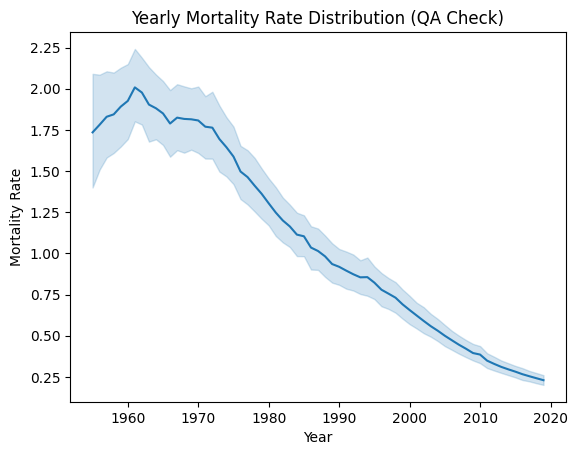


QA Summary Statistics by Country:
                                    count      mean       std       min  \
Country                                                                   
Afghanistan                         159.0  2.532872  1.487648  0.421510   
Albania                             111.0  0.078673  0.071439  0.011548   
Algeria                             183.0  1.535665  1.789377  0.075199   
Andorra                              90.0  0.643629  0.449246  0.000000   
Angola                              105.0  2.942911  1.208930  0.878703   
...                                   ...       ...       ...       ...   
Venezuela (Bolivarian Republic of)  192.0  0.296726  0.282244  0.044886   
Viet Nam                            153.0  0.378387  0.327925  0.043551   
Yemen                               159.0  2.167745  1.806324  0.376080   
Zambia                              186.0  2.510464  0.929986  0.603028   
Zimbabwe                            183.0  1.402606  0.509902  0.

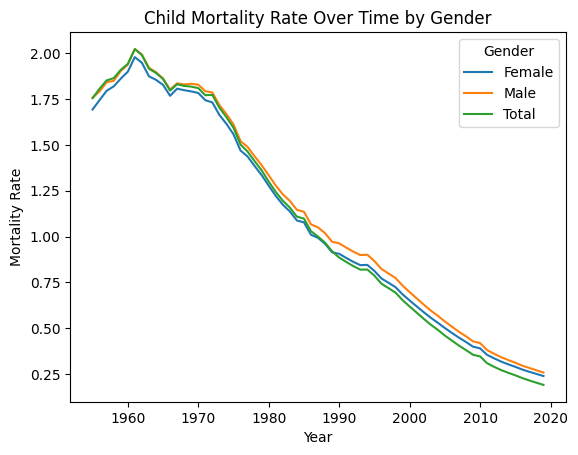

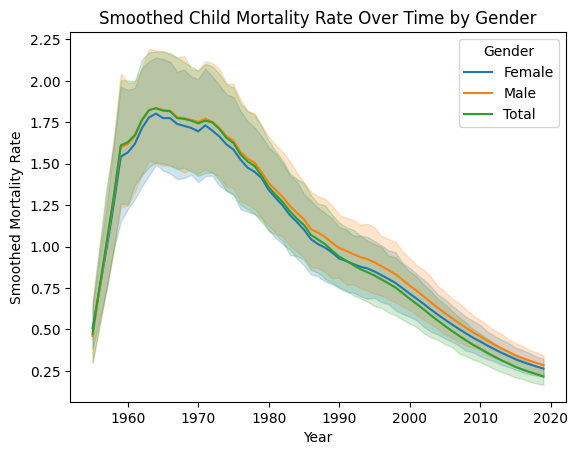

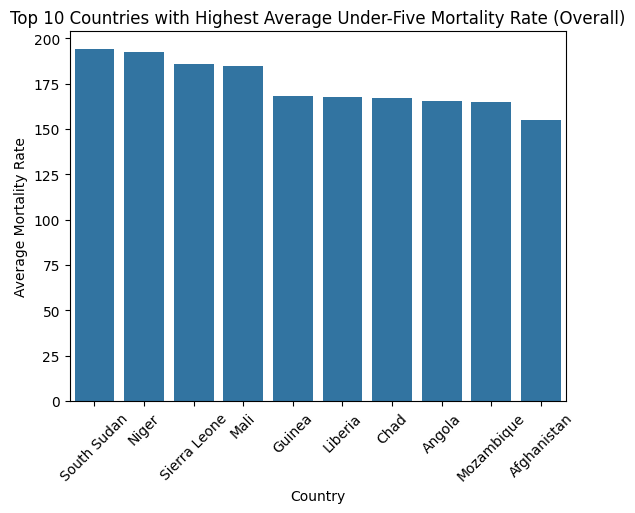

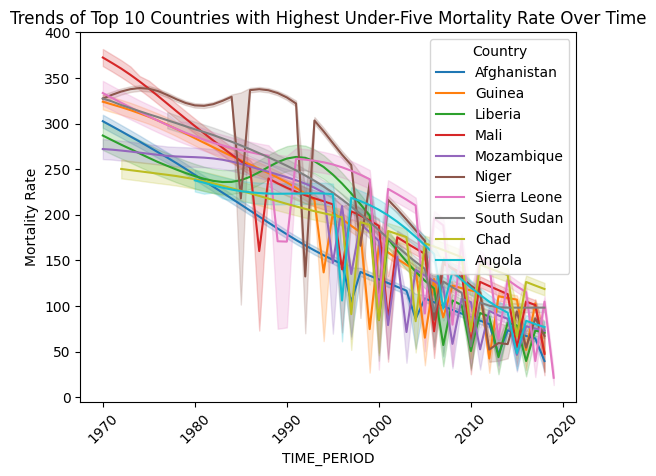

In [3]:
# Check for unusual patterns in mortality rates over time
sns.lineplot(x='Year', y='Mortality Rate', data=child_mortality_df)
plt.title('Yearly Mortality Rate Distribution (QA Check)')
plt.show()

# Identify outlier years or countries with inconsistent data patterns
# Group by country to calculate interquartile range (IQR) for QA
country_summary = child_mortality_df.groupby('Country')['Mortality Rate'].describe()
print("\nQA Summary Statistics by Country:")
print(country_summary)




# Grouping child mortality data by year and gender
mortality_trend = child_mortality_df.groupby(['Year', 'Gender'])['Mortality Rate'].mean().reset_index()

# Plot time-series trend
sns.lineplot(x='Year', y='Mortality Rate', hue='Gender', data=mortality_trend)
plt.title('Child Mortality Rate Over Time by Gender')
plt.show()

# Smoothed trend over time using rolling average
child_mortality_df['Smoothed Mortality Rate'] = child_mortality_df['Mortality Rate'].rolling(window=5).mean()
sns.lineplot(x='Year', y='Smoothed Mortality Rate', hue='Gender', data=child_mortality_df)
plt.title('Smoothed Child Mortality Rate Over Time by Gender')
plt.show()





# Calculate the average under-five mortality rate across the entire time period for each country
overall_mortality_comparison = malnutrition_data_df.groupby('Country')['OBS_VALUE'].mean().reset_index()

# Select the top 10 countries with the highest overall mortality rates
top_countries_overall = overall_mortality_comparison.sort_values(by='OBS_VALUE', ascending=False).head(10)

# Bar chart for top 10 countries over the entire time period
sns.barplot(x='Country', y='OBS_VALUE', data=top_countries_overall)
plt.title('Top 10 Countries with Highest Average Under-Five Mortality Rate (Overall)')
plt.xticks(rotation=45)
plt.ylabel('Average Mortality Rate')
plt.show()

# Line plot of top 10 countries' mortality rates over time
top_countries_over_time = malnutrition_data_df[malnutrition_data_df['Country'].isin(top_countries_overall['Country'])]
sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='Country', data=top_countries_over_time)
plt.title('Trends of Top 10 Countries with Highest Under-Five Mortality Rate Over Time')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.show()








4) STATISTICAL ANALYSIS



QA Correlation Check Between Mortality Rate and Population:
                  Mortality Rate  Total Population
Mortality Rate          1.000000         -0.048877
Total Population       -0.048877          1.000000


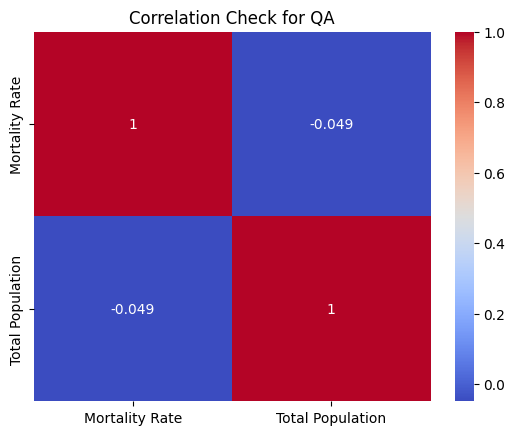


Correlation Between Mortality, Population, and Malnutrition:
                  Mortality Rate  Total Population  OBS_VALUE
Mortality Rate          1.000000         -0.048113   0.883728
Total Population       -0.048113          1.000000  -0.019174
OBS_VALUE               0.883728         -0.019174   1.000000


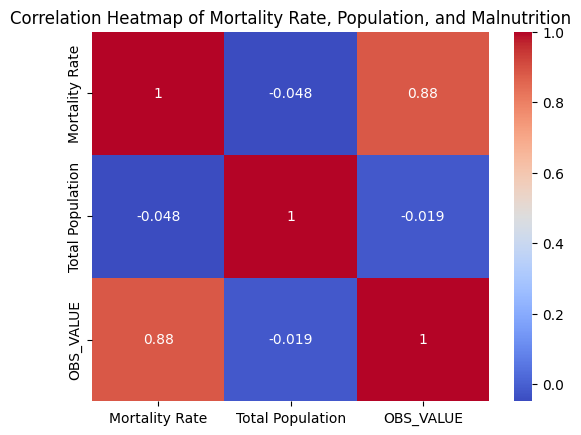

In [4]:
# Assess correlations as QA checks for unexpected data relationships
qa_correlation = child_mortality_df[['Mortality Rate', 'Total Population']].corr()
print("\nQA Correlation Check Between Mortality Rate and Population:")
print(qa_correlation)

# Detect anomalies through correlation heatmap (highlight outliers in relationships)
sns.heatmap(qa_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Check for QA')
plt.show()


# Merge child mortality and malnutrition datasets for further analysis
merged_df = pd.merge(child_mortality_df, malnutrition_data_df, left_on=['Country', 'Year'], right_on=['Country', 'TIME_PERIOD'], how='inner')

# Correlation heatmap including malnutrition data
corr_merged = merged_df[['Mortality Rate', 'Total Population', 'OBS_VALUE']].corr()
print("\nCorrelation Between Mortality, Population, and Malnutrition:")
print(corr_merged)

# Heatmap of the merged dataset correlations
sns.heatmap(corr_merged, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Mortality Rate, Population, and Malnutrition')
plt.show()


5) QUALITY ASSURANCE-SPECIFIC ANALYSIS


In [12]:
# Highlight countries with mortality rates significantly deviating from the average
def highlight_outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print("Q1:",Q1,"Q3",Q3)
    outliers = df[(df[col] < (Q1 - threshold * IQR)) | (df[col] > (Q3 + threshold * IQR))]
    return outliers

mortality_outliers = highlight_outliers(child_mortality_df, 'Mortality Rate')
print("\nCountries with Outlier Mortality Rates (QA Analysis):")
print(mortality_outliers[['Country', 'Year', 'Mortality Rate']])

# Print unique countries with outlier mortality rates
unique_countries = mortality_outliers['Country'].unique()
print("\nUnique Countries with Outlier Mortality Rates:")
print(unique_countries)
# Print the total count of unique countries with outlier mortality rates
total_unique_countries = len(unique_countries)
print("\nTotal Count of Unique Countries with Outlier Mortality Rates:", total_unique_countries)



Q1:0 0.046203046587343574 Q3 1.2411596300450891

Countries with Outlier Mortality Rates (QA Analysis):
           Country  Year  Mortality Rate
0      Afghanistan  1967        5.119653
1      Afghanistan  1968        5.034400
2      Afghanistan  1969        4.937255
3      Afghanistan  1970        4.850063
4      Afghanistan  1971        4.737217
...            ...   ...             ...
30726       Zambia  1989        3.035984
30727       Zambia  1990        3.061274
30728       Zambia  1991        3.077003
30729       Zambia  1992        3.080456
30730       Zambia  1993        3.065332

[3050 rows x 3 columns]

Unique Countries with Outlier Mortality Rates:
['Afghanistan' 'Algeria' 'Angola' 'Bangladesh' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' "Côte d'Ivoire"
 'Democratic Republic of the Congo' 'Egypt' 'Eritrea' 'Eswatini'
 'Ethiopia' 'Gambia' 'Ghana' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Haiti'
 'Hond

# **5) PREDICTIVE ANALYSIS**


## a) Linear Regression


In [6]:

# Prepare data for linear regression
X = child_mortality_df[['Year']]  # Independent variable
y = child_mortality_df['Mortality Rate']  # Dependent variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future mortality rates
y_pred = model.predict(X_test)

# Output model coefficients and intercept
print("\nLinear Regression Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)



Linear Regression Model Coefficients: [-0.03136621]
Model Intercept: 63.42782291259909


## b) Polynomial Regression


In [7]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Apply polynomial features for more complex patterns
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Coefficients of the polynomial regression
print("Coefficients:", model_poly.coef_)
print("Intercept:", model_poly.intercept_)


from sklearn.metrics import mean_squared_error, r2_score

# Predictions for the polynomial regression
y_pred_poly = model_poly.predict(X_poly)

# Calculate and print the mean squared error and R-squared score
print("Mean Squared Error:", root_mean_squared_error(y, y_pred_poly))
print("R² Score:", r2_score(y, y_pred_poly))



Coefficients: [ 0.00000000e+00 -3.65580537e-01  8.40239095e-05]
Intercept: 395.7416568904044
Mean Squared Error: 1.355419837203797
R² Score: 0.1380358142066216


## c) K-Means Clustering


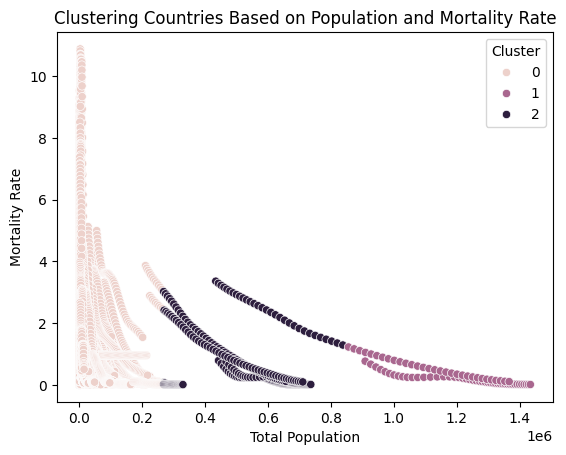

In [8]:
# Cluster countries based on mortality rate and total population
features = child_mortality_df[['Mortality Rate', 'Total Population']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(features)
child_mortality_df['Cluster'] = kmeans.labels_

# Visualize clustering
sns.scatterplot(x='Total Population', y='Mortality Rate', hue='Cluster', data=child_mortality_df)
plt.title('Clustering Countries Based on Population and Mortality Rate')
plt.show()

6) DOCUMENTATION AND REPORTING


In [9]:
# Updated QA summary report function with error handling for missing columns
def qa_report(df_name, df):
    report = {
        "Dataset": df_name,
        "Shape": df.shape,
        "Missing Values (%)": missing_percentage(df).to_dict()
    }
    
    # Check if 'Mortality Rate' column exists before calculating outliers and correlations
    if 'Mortality Rate' in df.columns:
        report["Outliers"] = len(highlight_outliers(df, 'Mortality Rate'))
    else:
        report["Outliers"] = "N/A - 'Mortality Rate' column missing"
    
    # Check if both 'Mortality Rate' and 'Total Population' columns exist for correlation calculation
    if all(col in df.columns for col in ['Mortality Rate', 'Total Population']):
        report["Correlation Summary"] = df[['Mortality Rate', 'Total Population']].corr().to_dict()
    else:
        report["Correlation Summary"] = "N/A - Required columns missing"
    
    return report

# Print or export QA summary reports for each dataset
print("\nQA Report - Child Mortality Data:")
print(qa_report("Child Mortality Data", child_mortality_df))

print("\nQA Report - Region Data:")
print(qa_report("Region Data", region_data_df))

print("\nQA Report - Malnutrition Data:")
print(qa_report("Malnutrition Data", malnutrition_data_df))



QA Report - Child Mortality Data:
{'Dataset': 'Child Mortality Data', 'Shape': (30940, 8), 'Missing Values (%)': {'Country': 0.0, 'Year': 0.0, 'Gender': 0.0, 'Child Mortality(1 to 4)': 0.0, 'Total Population': 0.0, 'Mortality Rate': 0.0, 'Smoothed Mortality Rate': 0.01292824822236587, 'Cluster': 0.0}, 'Outliers': 3050, 'Correlation Summary': {'Mortality Rate': {'Mortality Rate': 1.0, 'Total Population': -0.04887734272480597}, 'Total Population': {'Mortality Rate': -0.04887734272480597, 'Total Population': 1.0}}}

QA Report - Region Data:
{'Dataset': 'Region Data', 'Shape': (5302, 6), 'Missing Values (%)': {'Geographic Area': 0.0, 'Indicator': 0.0, 'Sex': 0.0, 'TIME_PERIOD': 0.0, 'OBS_VALUE': 0.0, 'Unit of Measure': 0.0}, 'Outliers': "N/A - 'Mortality Rate' column missing", 'Correlation Summary': 'N/A - Required columns missing'}

QA Report - Malnutrition Data:
{'Dataset': 'Malnutrition Data', 'Shape': (30901, 6), 'Missing Values (%)': {'Country': 0.0, 'Indicator': 0.0, 'Sex': 0.0, 'TI